In [1]:
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt
import helper
import scipy.io.wavfile as wav
from datetime import datetime
import least_squares
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi')
from midi import process_midi_to_note_info, notes_to_chords, dict_to_frequency_list, plot_piece



/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/least_squares.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(wav_file)


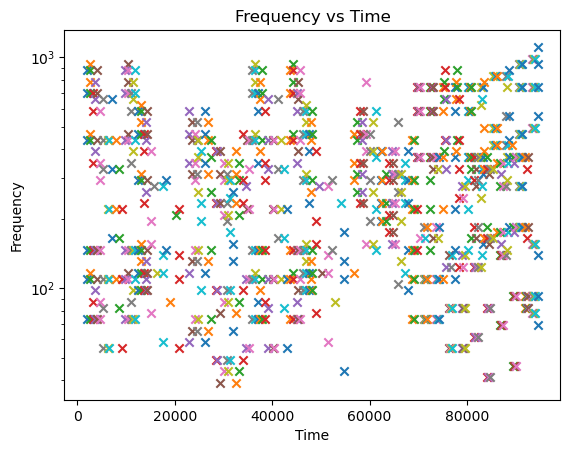

[[880.0, 698.4564628660078, 440.0, 146.8323839587038, 110.0, 73.41619197935188], [932.3275230361799, 783.9908719634985, 466.1637615180899, 116.54094037952248], [880.0, 698.4564628660078, 440.0, 146.8323839587038, 110.0, 73.41619197935188], [698.4564628660078, 587.3295358348151, 349.2282314330039, 73.41619197935188, 87.30705785825097, 146.8323839587038], [783.9908719634985, 659.2551138257398, 391.99543598174927, 73.41619197935188, 97.99885899543733, 146.8323839587038], [880.0, 698.4564628660078, 440.0, 146.8323839587038, 110.0, 73.41619197935188], [349.2282314330039, 293.6647679174076, 587.3295358348151, 73.41619197935188, 87.30705785825097, 146.8323839587038], [659.2551138257398, 440.0, 329.6275569128699, 55.0, 82.4068892282175, 110.0], [220.0, 440.0, 55.0, 110.0], [659.2551138257398, 329.6275569128699, 164.81377845643496], [440.0, 220.0, 110.0], [164.81377845643496, 329.6275569128699, 82.4068892282175], [220.0, 55.0, 110.0], [880.0, 440.0, 698.4564628660078, 146.8323839587038, 110.0, 

In [17]:
notes = process_midi_to_note_info(
    '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi_files/brahms_op10.midi')
chords = notes_to_chords(notes)

plot_piece(chords, 200)
plt.show()
score = dict_to_frequency_list(chords)
print(score)

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


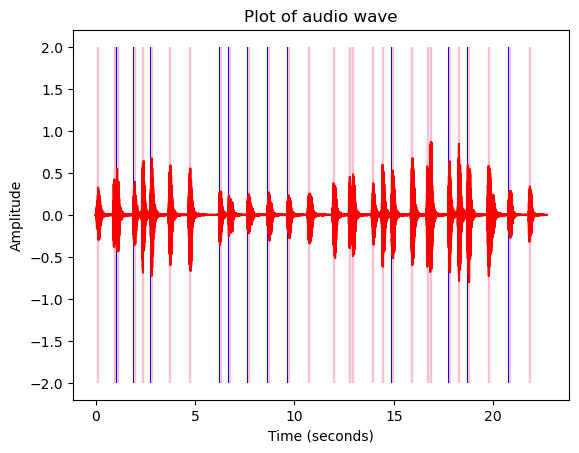

score frequencies:  [[880.0, 698.4564628660078, 440.0, 146.8323839587038, 110.0, 73.41619197935188], [932.3275230361799, 783.9908719634985, 466.1637615180899, 116.54094037952248], [880.0, 698.4564628660078, 440.0, 146.8323839587038, 110.0, 73.41619197935188], [698.4564628660078, 587.3295358348151, 349.2282314330039, 73.41619197935188, 87.30705785825097, 146.8323839587038], [783.9908719634985, 659.2551138257398, 391.99543598174927, 73.41619197935188, 97.99885899543733, 146.8323839587038], [880.0, 698.4564628660078, 440.0, 146.8323839587038, 110.0, 73.41619197935188], [349.2282314330039, 293.6647679174076, 587.3295358348151, 73.41619197935188, 87.30705785825097, 146.8323839587038], [659.2551138257398, 440.0, 329.6275569128699, 55.0, 82.4068892282175, 110.0], [220.0, 440.0, 55.0, 110.0], [659.2551138257398, 329.6275569128699, 164.81377845643496], [440.0, 220.0, 110.0], [164.81377845643496, 329.6275569128699, 82.4068892282175], [220.0, 55.0, 110.0], [880.0, 440.0, 698.4564628660078, 146.83

In [21]:
link =     '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/brahms_op10_staccato.wav'
sample_data, sample_rate, onset_times = detected_samples(
link, sample_length=1000, offset=2000, show=True, delta=0.15, num_samples=1000000, normalise=False)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))
prob_matrix = np.zeros((len(score), len(sample_data)))

print('score frequencies: ' , score)
print(score[0])
print(type(time_samples))


0it [00:00, ?it/s]

5it [00:02,  2.35it/s]


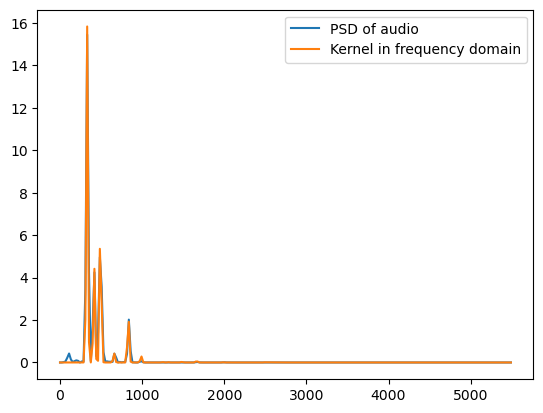

0it [00:00, ?it/s]

[13281.56593731  3927.98636427  6160.20593952    63.44312377
  1837.40212765]


5it [00:02,  2.46it/s]
5it [00:02,  2.49it/s]
5it [00:02,  2.44it/s]


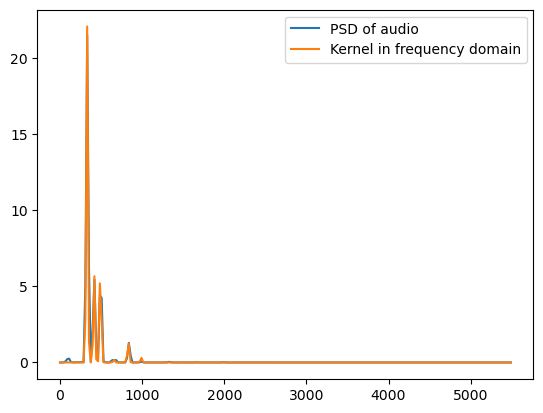

0it [00:00, ?it/s]

[18538.3665155   5047.39065751  5985.9867513    450.09328004
  1099.82435094]


5it [00:02,  2.40it/s]
5it [00:02,  2.48it/s]
5it [00:01,  2.52it/s]


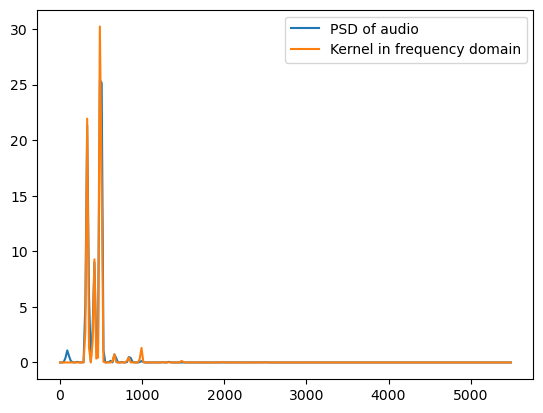

0it [00:00, ?it/s]

[18410.66510812  8257.5784632  34776.16110798    37.35222022
   196.79378283]


5it [00:02,  2.40it/s]
5it [00:01,  2.51it/s]

[-29163.107244011284, -12938.797188215674, -37865.1965946252]
[13316.705598329536, 13348.388666248567, 13349.396012426358]
[13828.134481125104, 14208.013106242546, 14318.519893566634]


In [28]:
# Looking into power normalisation
probs_amp_normalised = []
probs_normalised = []
probs = []
for sample in sample_data[:3]:
    probs.append(-helper.stable_nlml(time_samples, sample,T=2,v=5,  normalised=False, f=[329, 415, 493, 659,
       831]))
    a = abs(least_squares.opt_amplitude(sample, show=True, T=2,v=5,  f=[329, 415, 493, 659,831])[0])
    plt.show()
    print(a)
    probs_amp_normalised.append(-helper.stable_nlml(time_samples, sample,T=2,v=5,   f=[329, 415, 493, 659,
       831], amplitude=a))
    probs_normalised.append(-helper.stable_nlml(time_samples, sample,T=2,v=5,   f=[329, 415, 493, 659,
       831]))

print(probs)
print(probs_normalised)
print(probs_amp_normalised)
# sample0 = helper.power_normalise(sample_data[0])
# sample1 = helper.power_normalise(sample_data[1])
# sample2 = helper.power_normalise(sample_data[2])
# sample3 = helper.power_normalise(sample_data[3])

# sample4 = helper.power_normalise(sample_data[4])
# helper.plot_audio(time_samples, sample0)
# plt.show()
# helper.plot_audio(time_samples, sample1)
# plt.show()
# helper.plot_audio(time_samples,sample2)
# plt.show()
# helper.plot_audio(time_samples,sample3)
# plt.show()
# helper.plot_audio(time_samples, sample4)
# plt.show()

In [30]:
print(np.var(probs_normalised))
print(np.var(probs_amp_normalised))
print(np.var(probs))

230.38830143395126
44110.81917791769
106697775.91339022


In [13]:
print(-helper.stable_nlml(time_samples, sample_data[7]/sum(sample_data[7]), v=5, f=[657]) )
print(-helper.stable_nlml(time_samples, sample_data[7]/sum(sample_data[7]), v=5, f=[261]) )

print(-helper.stable_nlml(time_samples, sample_data[7]/sum(sample_data[7]), v=5, f=[659,261]) )
print(-helper.stable_nlml(time_samples, sample_data[7]/sum(sample_data[7]), v=5, f=[330]) )
print(-helper.stable_nlml(time_samples, sample_data[7]/sum(sample_data[7]), v=5, f=[330*3]) )
# helper.plot_audio(time_samples, sample_data[7]/sum(abs(sample_data[0])))
# plt.show()





0it [00:00, ?it/s]

1it [00:00,  2.32it/s]
0it [00:00, ?it/s]

11751.853116719558


1it [00:00,  2.31it/s]
0it [00:00, ?it/s]

11901.73801706179


2it [00:00,  2.43it/s]
0it [00:00, ?it/s]

12715.740530133422


1it [00:00,  1.26it/s]
0it [00:00, ?it/s]

11961.32485405356


1it [00:00,  1.88it/s]

10089.911156046677


In [22]:
def oltw(sample_data: list, score: list, time_samples: np.ndarray, n: int):
    note_num, audio_num = 0, 0
    path = []
    for sample in sample_data[:-n]:
        probabilities = []
        num_lookahead = min(len(score) - note_num + 1, n)
        for i in range(num_lookahead):
            probabilities.append(helper.stable_nlml(time_samples=time_samples, Y=sample, T=2, v=5, M=10, f=score[note_num+i]))
        
        # priors = 1/np.arange(1, num_lookahead+1)
        priors = np.ones(num_lookahead)
        probabilities = np.array(probabilities)
        probabilities = probabilities * priors

        index = np.argmin(probabilities)
        note_num += index
        audio_num += 1
        path.append((note_num, audio_num))
    return path


path = oltw(sample_data, score, time_samples, 3)



0it [00:00, ?it/s]

6it [00:00, 14.50it/s]
4it [00:00, 14.53it/s]
6it [00:00, 13.42it/s]
6it [00:00, 14.47it/s]
4it [00:00, 13.61it/s]
6it [00:00, 15.14it/s]
4it [00:00, 16.51it/s]
6it [00:00, 16.65it/s]
6it [00:00, 16.60it/s]
6it [00:00, 14.15it/s]
6it [00:00, 14.40it/s]
6it [00:00, 14.49it/s]
6it [00:00, 14.39it/s]
6it [00:00, 14.42it/s]
6it [00:00, 16.67it/s]
6it [00:00, 14.64it/s]
6it [00:00, 14.54it/s]
6it [00:00, 14.33it/s]
6it [00:00, 15.92it/s]
6it [00:00, 16.60it/s]
6it [00:00, 17.91it/s]
6it [00:00, 18.10it/s]
6it [00:00, 14.28it/s]
4it [00:00, 13.58it/s]
6it [00:00, 13.72it/s]
4it [00:00, 18.23it/s]
3it [00:00, 18.51it/s]
4it [00:00, 19.28it/s]
3it [00:00, 18.57it/s]
3it [00:00, 15.09it/s]
4it [00:00, 18.58it/s]
3it [00:00, 13.61it/s]
3it [00:00, 14.15it/s]
3it [00:00, 12.92it/s]
3it [00:00, 13.15it/s]
3it [00:00, 13.77it/s]
3it [00:00, 13.99it/s]
3it [00:00, 16.41it/s]
3it [00:00, 17.56it/s]
3it [00:00, 17.72it/s]
3it [00:00, 17.69it/s]
6it [00:00, 15.90it/s]
6it [00:00, 16.66it/s]
4it [00:00,

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (8, 10), (9, 11), (10, 12), (11, 13), (13, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 25), (24, 26)]


/var/folders/n4/k97yk30s1wn32d7y6729kph80000gn/T/ipykernel_78842/4174037874.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(link)


IndexError: list index out of range

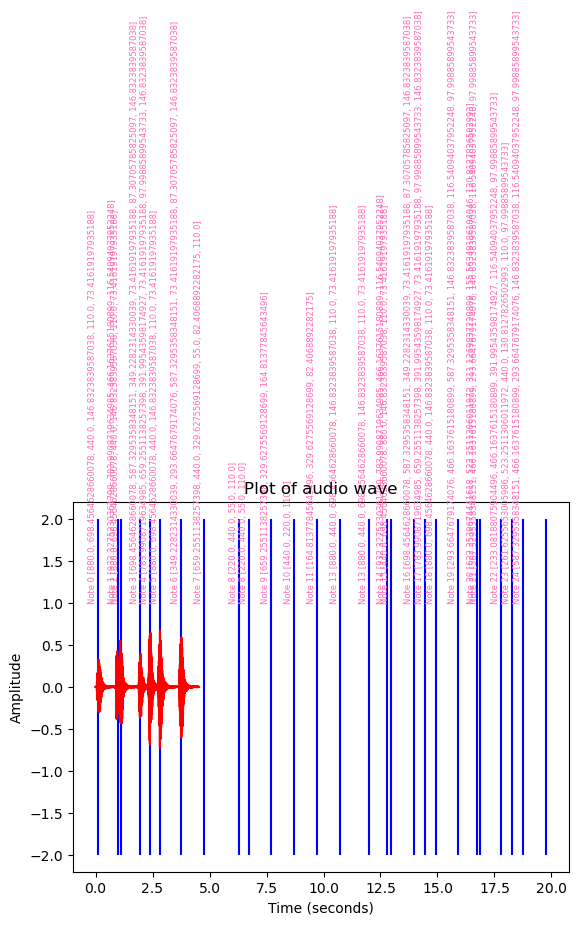

In [23]:
print(path)
sample_rate, data = wav.read(link)
data = data[:1000000]
audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

for i, time in enumerate(onset_times[:-2]):
    plt.vlines(time +2000/44100, ymin=-
                       2, ymax=2, colors='blue', zorder=2)
    note = path[i][0]
    plt.text(time, 1, f'Note {note} {score[note]}', color='#FF69B4', ha='right', va='bottom', rotation=90, fontsize=6)


In [8]:
print(-helper.stable_nlml(time_samples, sample_data[7],f=[659] ))

1it [00:00,  7.78it/s]

6303.569891131607
